In [45]:
import networkx as nx
import sys
import isort
import importlib
from types import ModuleType


In [46]:
G = nx.Graph()

In [47]:
def get_stdlib_packages():
    if sys.version_info.minor == 10:
        module_names = sys.stdlib_module_names
    else:
        module_names = isort.stdlibs.py38.stdlib

    external_packages = list()
    for name in module_names:
        if name[0] == '_' or name == 'this' or name == 'antigravity':
            continue
        external_packages.append(name)
    return external_packages

def get_real_packages(package_names):
    real_modules = list()
    not_importable_modules = list()
    for name in package_names:
        try:
            importlib.import_module(name)
            real_modules.append(name)
        except:
            not_importable_modules.append(name)
    return real_modules, not_importable_modules


def get_real():
    external_packages = get_stdlib_packages()
    return get_real_packages(external_packages)

In [48]:
real_modules, _ = get_real()

In [49]:
def module_dependency(module_names, name):
    if name not in module_names:
        raise Exception(f'{name} is not importable module')
    dp_names = list()

    for key, val in vars(sys.modules[name]).items():
        if isinstance(val, ModuleType):
            md_name = val.__name__

            try:
                index = md_name.index(".")
                md_name = md_name[0:index]
            except:
                pass
                
            if md_name != name:
                dp_names.append(md_name)

    return dp_names

In [50]:
dp = module_dependency(real_modules, 'urllib')
print(dp)

# print(vars(sys.modules['urllib']).items())

[]


In [51]:
def module_dependency_map(modules):
    md_map = dict()
    for md in modules:
        md_map[md] = module_dependency(modules, md)
    return md_map

md_map = module_dependency_map(real_modules)

In [52]:
def build_adj_list(md_map):
    index_list = list()
    edges = list()

    for k, v in md_map.items():
        index_list.append(k)

    n = len(index_list)
    for i in range(n):
        adj_v = md_map[index_list[i]]
        for name in adj_v:
            try:
                j = index_list.index(name)
                edges.append(tuple([i,j]))
            except:
                continue

    return edges, index_list

In [53]:
def build_adj_list_md(md_map):
    edges = list()

    for k, v in md_map.items():
        for name in v:
            edges.append(tuple([k, name]))

    return edges

In [54]:
edges = build_adj_list_md(md_map)
# print(edges)

In [55]:
# print(md_map)

In [56]:
# G.add_edges_from(edges)

In [57]:
# print(len(list(G.nodes)))

In [58]:
DG = nx.DiGraph(edges)

In [59]:
# print(len(list(DG.nodes)))

In [60]:
sorted(nx.simple_cycles(DG))

[['posixpath', 'os']]

In [61]:
import os
import posixpath

# print(md_map)

In [75]:
def get_version():
    v = sys.version_info

    return str(v.major) + '.' + str(v.minor) + '.' + str(v.micro)

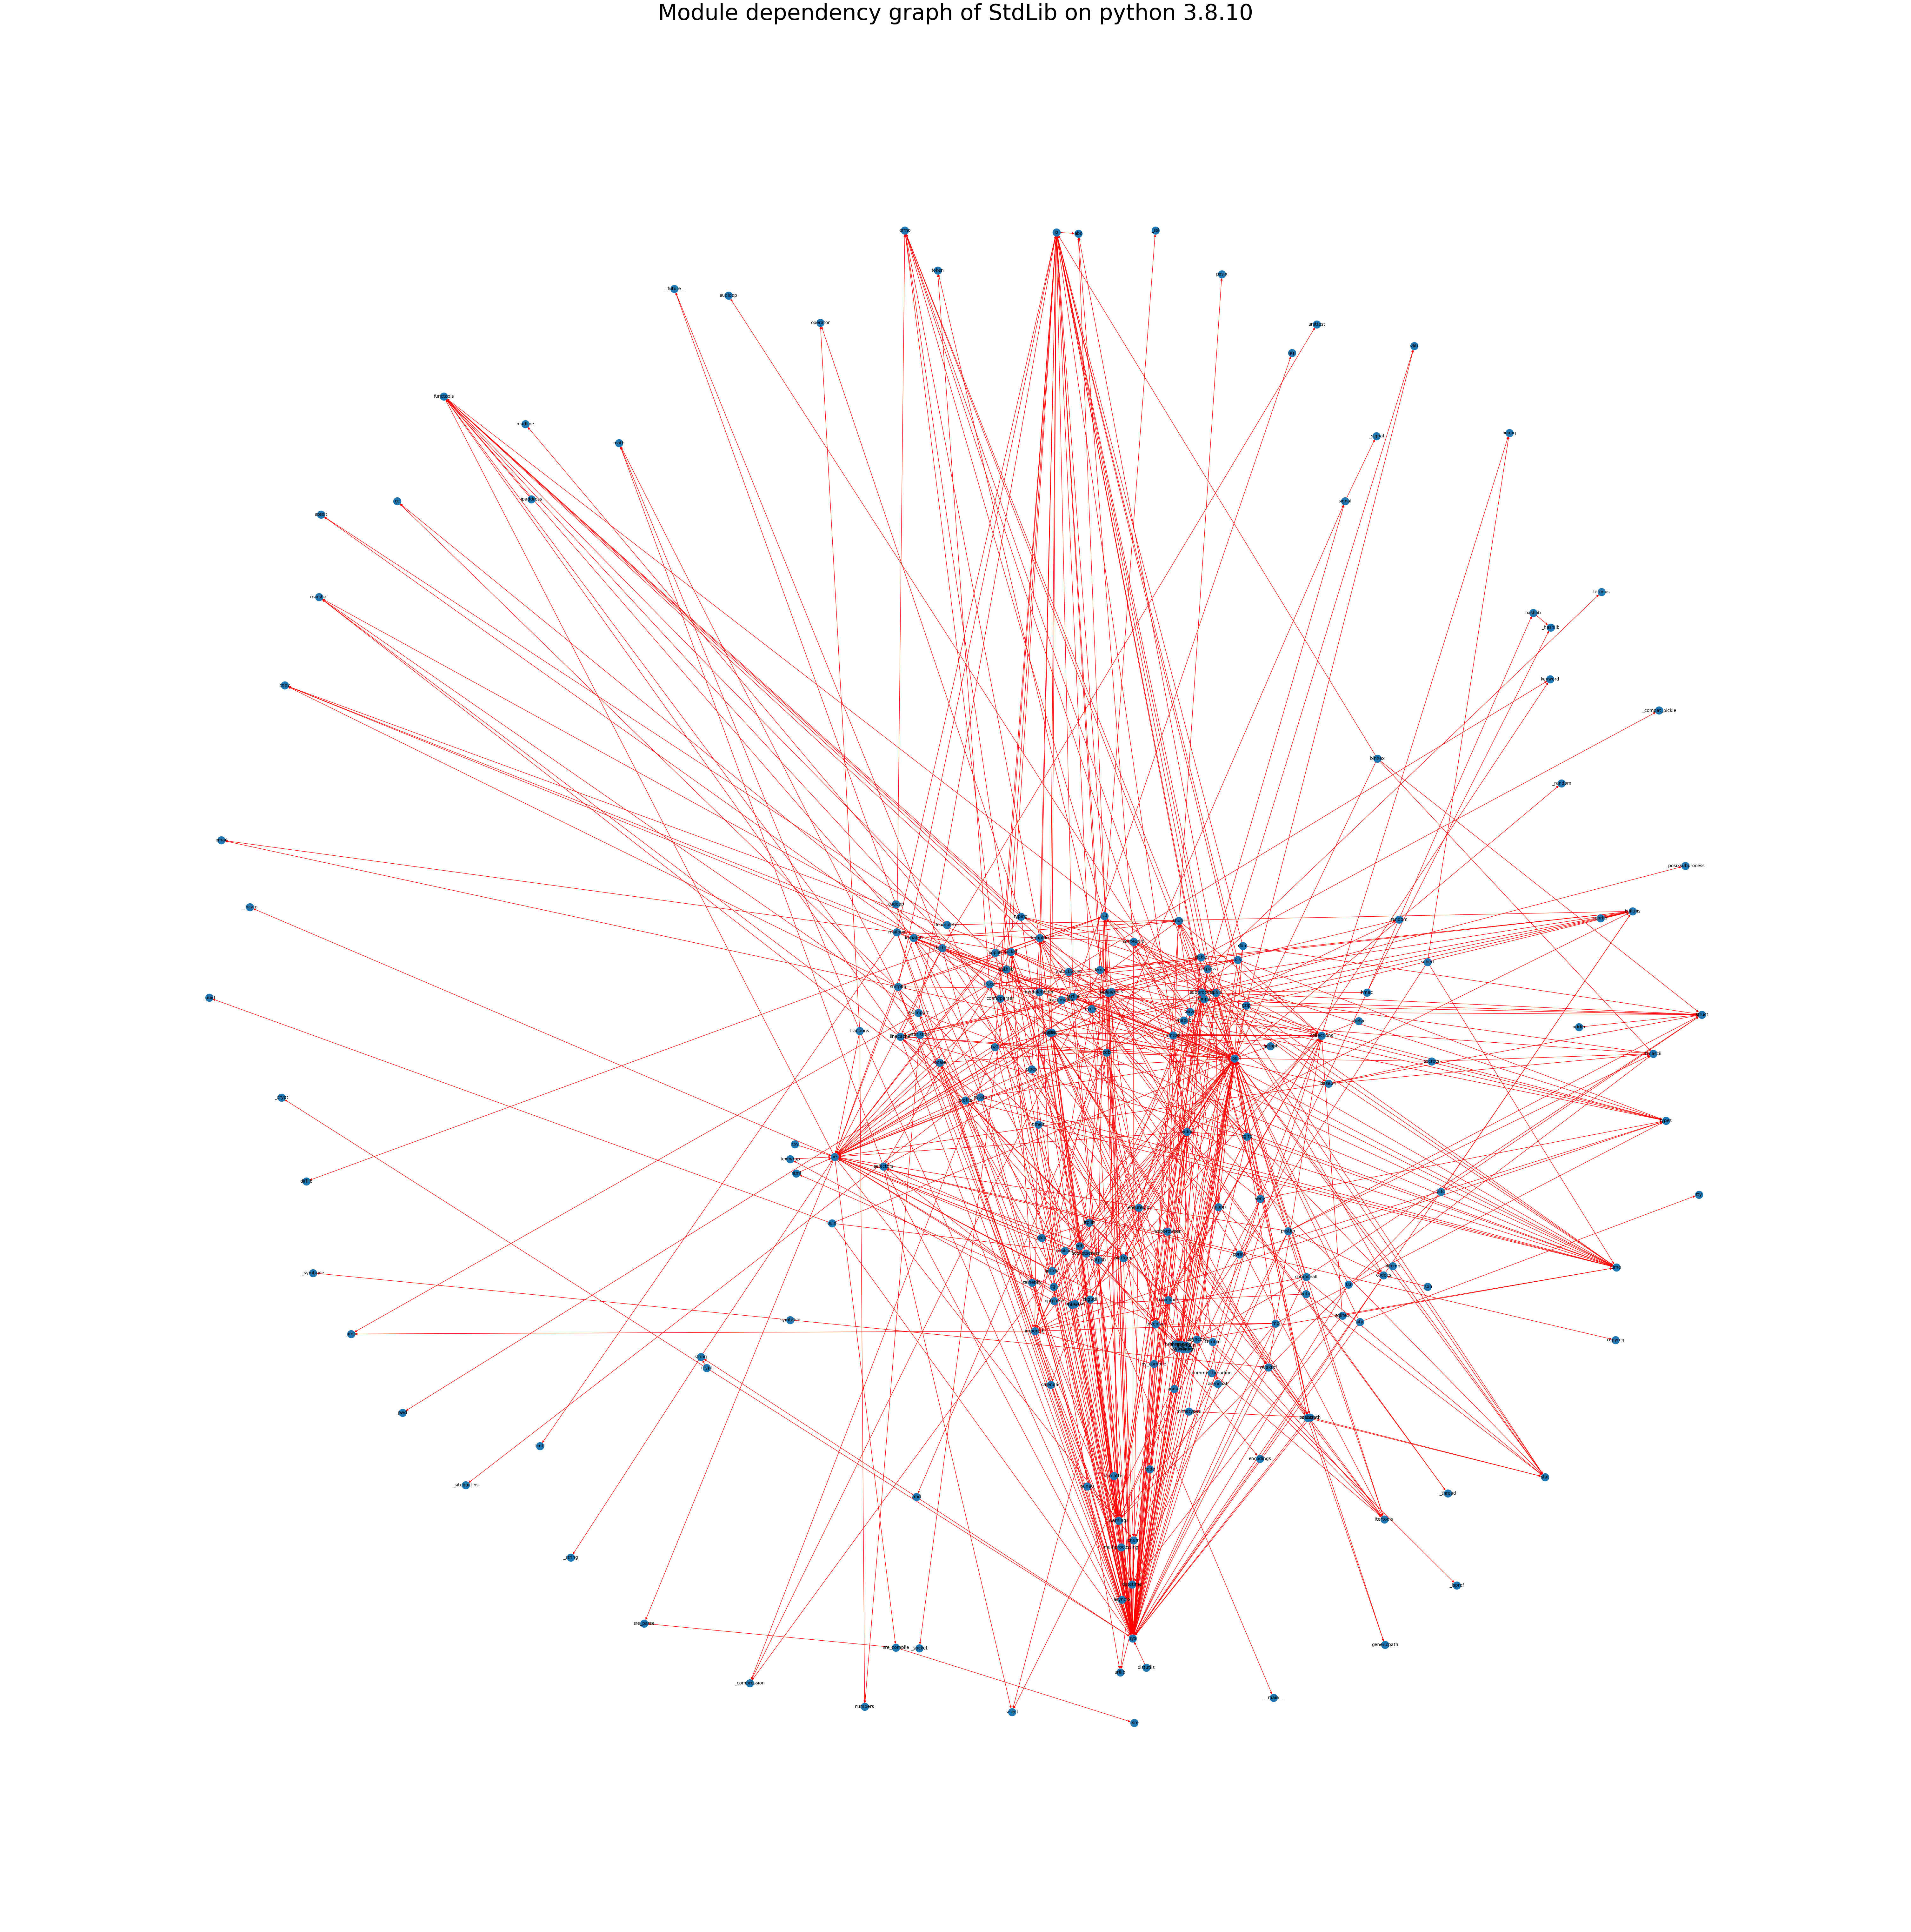

In [76]:
import matplotlib.pyplot as plt
plt.figure(3,figsize=(60,60)) 
pos = nx.spring_layout(G, iterations=10, seed=227)
nx.draw_spring(DG, edge_color="r", font_size=10, with_labels=True)
ax = plt.gca()
ax.margins(0.08)
plt.title(f'Module dependency graph of StdLib on python {get_version()}', fontsize=50)
plt.show()